In [2]:
import numpy as np
import matplotlib.pyplot as plt

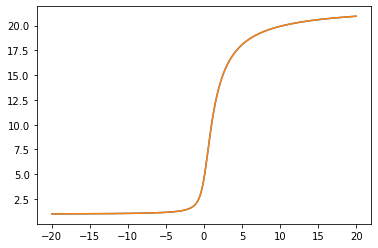

0.0001201707231111847
796


In [20]:
counter_old = 0
def rk4_step(fun,x,y,h):
    k1 = h*fun(x,y)
    k2 = h*fun(x+h/2, y+k1/2)
    k3 = h*fun(x+h/2, y+k2/2)
    k4 = h*fun(x+h, y+k3)
    dy = (k1+ 2*k2 + 2*k3 + k4)/6
    
    global counter_old
    counter_old +=4
    
    return y + dy


def fun(x,y):
    return y/(1 + x**2)



y0 = 1
x = np.linspace(-20,20,200)
h = np.median(np.diff(x))
y = np.zeros(len(x))
y[0] = y0

for i in range(len(x) - 1):
    y[i+1] = rk4_step(fun, x[i],y[i],h)

y_true = np.exp(np.arctan(x) + np.arctan(20))
plt.plot(x,y)
plt.plot(x,y_true)
plt.show()
err = np.abs(np.std(y - y_true))
print(err)
print(counter_old)

In [17]:
def rk4_stepd(fun, x, y, h):
    
    left = rk4_step(fun, x, y, h/2)
    right = rk4_step(fun,x+h/2,left, h/2)
    
    return right
    

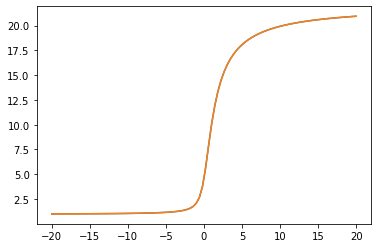

792


In [23]:
counter_old = 0
y0 = 1
x = np.linspace(-20,20,100)
h = np.median(np.diff(x))
y = np.zeros(len(x))
y[0] = y0

for i in range(len(x) - 1):
    y[i+1] = rk4_stepd(fun, x[i],y[i],h)

    
y_true = np.exp(np.arctan(x) + np.arctan(20))
plt.plot(x,y)
plt.plot(x,y_true)
plt.show()
err = np.abs(np.std(y - y_true))
print(counter_old)

In [24]:
err

0.00012270791889806674